### makemore: lect02

### day02
- 202403010815-202403010830
- 202403011945-202403012100
- 2024030120000-202403012300

- ### day03
- 202403020800-202403021500
- 202403021830-202403022100

### Pointers:

Eric Z Yang’s blog:

- http://blog.ezyang.com/

- Tensor Strided Representation

In [52]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
words = open("./names.txt").read().splitlines()

In [54]:
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [55]:
len(words)

32033

In [56]:
chars = sorted(list(set("".join(words))))
chars[:10]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [57]:
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}

In [58]:
# stoi
# itos

In [74]:
### build data sets

block_size = 3
X, Y = [], []

for word in words[:5]:
    context = [0] * block_size
    print(word)
    
    for ch in word + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print("".join(itos[i] for i in context), "--->", itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [77]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [78]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [79]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [787]:
C = torch.randn((27, 2))

In [788]:
C

tensor([[ 0.4785, -0.7978],
        [-1.5453,  1.2122],
        [-0.5830,  2.4567],
        [ 1.3001, -0.5024],
        [-1.2819, -0.3146],
        [ 0.4214, -0.8273],
        [ 1.4603,  0.1817],
        [ 0.2353, -1.0760],
        [-1.1252,  0.9395],
        [ 0.5772,  1.1144],
        [ 0.7614, -0.7450],
        [-0.9355,  1.4968],
        [-0.7895, -2.3945],
        [ 0.2177, -0.3880],
        [ 0.5801,  1.0844],
        [-0.6729,  1.7206],
        [ 1.4660,  0.6374],
        [ 0.4519, -2.3000],
        [-1.0275,  0.5563],
        [ 0.6184, -0.0192],
        [-0.3335, -2.6435],
        [-0.5725, -0.2676],
        [ 0.4260, -0.4256],
        [ 0.5144, -0.9335],
        [ 0.0953, -1.5730],
        [-1.3048, -0.4620],
        [ 1.7896,  2.6972]])

In [789]:
C[5]

tensor([ 0.4214, -0.8273])

In [790]:
F.one_hot(torch.tensor(5), num_classes=27).float()

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [791]:
F.one_hot(torch.tensor(5), num_classes=27).shape

torch.Size([27])

In [792]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([ 0.4214, -0.8273])

In [793]:
C[[5, 6, 7]]

tensor([[ 0.4214, -0.8273],
        [ 1.4603,  0.1817],
        [ 0.2353, -1.0760]])

In [794]:
C[6]

tensor([1.4603, 0.1817])

In [795]:
C[torch.tensor([5, 6, 7, 7, 7, 7])]

tensor([[ 0.4214, -0.8273],
        [ 1.4603,  0.1817],
        [ 0.2353, -1.0760],
        [ 0.2353, -1.0760],
        [ 0.2353, -1.0760],
        [ 0.2353, -1.0760]])

In [796]:
X[13]

tensor([0, 0, 1])

In [98]:
X[13, 2]

tensor(1)

In [99]:
X[13][2]

tensor(1)

In [100]:
C[X]

tensor([[[-0.4744,  0.7216],
         [-0.4744,  0.7216],
         [-0.4744,  0.7216]],

        [[-0.4744,  0.7216],
         [-0.4744,  0.7216],
         [ 2.4251, -0.1251]],

        [[-0.4744,  0.7216],
         [ 2.4251, -0.1251],
         [ 0.0492,  0.1445]],

        [[ 2.4251, -0.1251],
         [ 0.0492,  0.1445],
         [ 0.0492,  0.1445]],

        [[ 0.0492,  0.1445],
         [ 0.0492,  0.1445],
         [-0.9487, -0.8000]],

        [[-0.4744,  0.7216],
         [-0.4744,  0.7216],
         [-0.4744,  0.7216]],

        [[-0.4744,  0.7216],
         [-0.4744,  0.7216],
         [-0.9416, -0.0752]],

        [[-0.4744,  0.7216],
         [-0.9416, -0.0752],
         [-0.9143, -0.7136]],

        [[-0.9416, -0.0752],
         [-0.9143, -0.7136],
         [-0.3447,  0.7677]],

        [[-0.9143, -0.7136],
         [-0.3447,  0.7677],
         [ 0.0478, -1.5242]],

        [[-0.3447,  0.7677],
         [ 0.0478, -1.5242],
         [-0.3447,  0.7677]],

        [[ 0.0478, -1

In [103]:
C[X][2]

tensor([[-0.4744,  0.7216],
        [ 2.4251, -0.1251],
        [ 0.0492,  0.1445]])

In [104]:
X[2]

tensor([ 0,  5, 13])

In [106]:
C[0], C[5], C[13]

(tensor([-0.4744,  0.7216]),
 tensor([ 2.4251, -0.1251]),
 tensor([0.0492, 0.1445]))

In [112]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [737]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [738]:
emb @ W1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [739]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1).shape

torch.Size([32, 6])

In [740]:
torch.cat(torch.unbind(emb, 1), dim=1).shape

torch.Size([32, 6])

In [741]:
torch.cat(torch.unbind(emb, 1), dim=1)

tensor([[ 1.5674, -0.2373,  1.5674, -0.2373,  1.5674, -0.2373],
        [ 1.5674, -0.2373,  1.5674, -0.2373, -0.4713,  0.7868],
        [ 1.5674, -0.2373, -0.4713,  0.7868,  2.4448, -0.6701],
        [-0.4713,  0.7868,  2.4448, -0.6701,  2.4448, -0.6701],
        [ 2.4448, -0.6701,  2.4448, -0.6701, -0.0274, -1.1008],
        [ 1.5674, -0.2373,  1.5674, -0.2373,  1.5674, -0.2373],
        [ 1.5674, -0.2373,  1.5674, -0.2373, -1.0725,  0.7276],
        [ 1.5674, -0.2373, -1.0725,  0.7276, -0.0707,  2.4968],
        [-1.0725,  0.7276, -0.0707,  2.4968,  0.6772, -0.8404],
        [-0.0707,  2.4968,  0.6772, -0.8404, -0.1158, -1.2078],
        [ 0.6772, -0.8404, -0.1158, -1.2078,  0.6772, -0.8404],
        [-0.1158, -1.2078,  0.6772, -0.8404, -0.0274, -1.1008],
        [ 1.5674, -0.2373,  1.5674, -0.2373,  1.5674, -0.2373],
        [ 1.5674, -0.2373,  1.5674, -0.2373, -0.0274, -1.1008],
        [ 1.5674, -0.2373, -0.0274, -1.1008, -0.1158, -1.2078],
        [-0.0274, -1.1008, -0.1158, -1.2

In [742]:
h = emb.view(32, 6) @ W1 + b1
h

tensor([[ 1.6233, -4.0704, -3.4199,  ...,  1.9779, -2.8803,  1.9109],
        [ 1.8276, -5.6150, -1.1974,  ..., -1.3477, -0.7535,  1.5696],
        [ 0.6742, -0.4907, -6.8555,  ...,  3.1882, -0.2206,  1.8439],
        ...,
        [-2.5173,  2.3641, -1.5411,  ...,  6.9627, -2.3169, -0.2760],
        [-0.3894, -4.7696, -2.3894,  ...,  2.9835, -4.8239,  2.4797],
        [ 2.8446, -4.8365, -2.5342,  ..., -0.9226, -2.0724, -0.5657]])

In [743]:
h = emb.view(-1, 6) @ W1 + b1
h

tensor([[ 1.6233, -4.0704, -3.4199,  ...,  1.9779, -2.8803,  1.9109],
        [ 1.8276, -5.6150, -1.1974,  ..., -1.3477, -0.7535,  1.5696],
        [ 0.6742, -0.4907, -6.8555,  ...,  3.1882, -0.2206,  1.8439],
        ...,
        [-2.5173,  2.3641, -1.5411,  ...,  6.9627, -2.3169, -0.2760],
        [-0.3894, -4.7696, -2.3894,  ...,  2.9835, -4.8239,  2.4797],
        [ 2.8446, -4.8365, -2.5342,  ..., -0.9226, -2.0724, -0.5657]])

In [744]:
h.shape

torch.Size([32, 100])

In [745]:
h = torch.tanh(h)

In [746]:
h

tensor([[ 0.9251, -0.9994, -0.9979,  ...,  0.9624, -0.9937,  0.9572],
        [ 0.9496, -1.0000, -0.8328,  ..., -0.8735, -0.6372,  0.9170],
        [ 0.5878, -0.4548, -1.0000,  ...,  0.9966, -0.2171,  0.9512],
        ...,
        [-0.9871,  0.9825, -0.9123,  ...,  1.0000, -0.9808, -0.2692],
        [-0.3708, -0.9999, -0.9833,  ...,  0.9949, -0.9999,  0.9861],
        [ 0.9933, -0.9999, -0.9875,  ..., -0.7271, -0.9688, -0.5122]])

In [747]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [748]:
logits = h @ W2 + b2
logits

tensor([[ 1.0659e+00,  2.9817e+00,  2.7962e-02,  1.4235e+01,  1.8077e+01,
         -5.8721e+00, -1.7503e+01, -8.4218e+00, -1.1657e+01, -1.2635e+01,
          1.2448e+01,  1.8399e-01, -4.7252e+00,  1.0348e+01, -5.1473e+00,
          2.4915e+00, -5.6519e+00, -2.3304e+00, -7.4571e+00,  1.1120e+01,
          1.0468e+01, -1.3974e+01,  1.4221e+00, -1.3522e+01,  8.1082e+00,
          1.7334e+01, -9.2145e+00],
        [ 7.3901e+00, -2.4012e+00, -2.3401e+00,  1.3078e+01,  2.8804e+00,
          1.2224e+00, -4.9725e+00,  7.9337e+00, -1.1514e+01, -9.5379e+00,
          1.0215e+01, -8.1818e-02, -8.8156e+00,  3.3208e+00, -8.0629e+00,
          1.0082e+01,  6.8953e-01,  2.1037e-01, -1.8014e+01,  1.5362e+01,
         -9.9827e-01, -1.3612e+01,  1.1934e+01,  2.1901e+00,  7.4204e+00,
          1.0179e+01, -6.4612e+00],
        [ 3.5694e+00, -1.1649e+00,  3.2302e+00,  9.4395e+00,  5.5879e+00,
         -6.9875e-01, -9.8759e+00, -7.1603e+00, -9.4191e+00, -9.3783e+00,
          1.1640e+01, -6.8816e+00, -4.12

In [749]:
logits.shape

torch.Size([32, 27])

In [750]:
counts = logits.exp()

In [751]:
counts.sum(dim=0)

tensor([8.6475e+07, 1.9013e+06, 6.1864e+05, 1.4089e+07, 7.7392e+10, 5.3173e+05,
        2.9770e+03, 3.5008e+05, 2.4676e+04, 3.1479e+03, 3.3725e+07, 4.0460e+02,
        7.9071e+03, 8.6190e+08, 5.6637e+08, 1.6794e+07, 6.6743e+04, 1.2567e+04,
        2.0487e+02, 1.5374e+07, 2.5167e+07, 4.2382e+02, 3.7019e+05, 4.1826e+06,
        4.7083e+09, 2.1116e+08, 4.0984e+01])

In [752]:
# counts.sum(dim=1)

In [753]:
probs.shape

torch.Size([32, 27])

In [754]:
probs[0]

tensor([1.0968e-03, 1.0691e-12, 7.9898e-06, 7.8595e-05, 1.6160e-03, 6.8072e-03,
        5.0664e-08, 4.1261e-02, 5.2901e-08, 6.2317e-13, 2.2595e-05, 1.5585e-10,
        2.2935e-04, 4.3914e-03, 3.5669e-06, 2.0236e-01, 7.7796e-07, 9.5830e-06,
        1.6706e-08, 3.3217e-01, 1.2707e-02, 1.6207e-04, 5.5454e-06, 3.9704e-01,
        2.6911e-05, 4.4519e-08, 4.6710e-06])

In [755]:
probs = counts / counts.sum(dim=1, keepdim=True)

In [756]:
probs.shape

torch.Size([32, 27])

In [757]:
probs[0]

tensor([2.7236e-08, 1.8499e-07, 9.6468e-09, 1.4270e-02, 6.6552e-01, 2.6426e-11,
        2.3489e-16, 2.0640e-12, 8.1259e-14, 3.0533e-14, 2.3906e-03, 1.1276e-08,
        8.3198e-11, 2.9263e-04, 5.4549e-11, 1.1331e-07, 3.2935e-11, 9.1231e-10,
        5.4156e-12, 6.3301e-04, 3.3010e-04, 8.0073e-15, 3.8889e-08, 1.2586e-14,
        3.1161e-05, 3.1653e-01, 9.3421e-13])

In [758]:
probs[0].sum(), probs[1].sum(), probs[2].sum()

(tensor(1.), tensor(1.), tensor(1.))

In [759]:
a = torch.tensor([[1, 2, 5], [4, 5, 1]])

In [760]:
a

tensor([[1, 2, 5],
        [4, 5, 1]])

In [761]:
a.shape

torch.Size([2, 3])

In [762]:
a.sum(dim=0)

tensor([5, 7, 6])

In [763]:
a.sum(dim=1)

tensor([ 8, 10])

In [764]:
a.sum(dim=1, keepdim=True)

tensor([[ 8],
        [10]])

In [765]:
a / a.sum(dim=0)

tensor([[0.2000, 0.2857, 0.8333],
        [0.8000, 0.7143, 0.1667]])

In [766]:
a / a.sum(dim=1, keepdim=True)

tensor([[0.1250, 0.2500, 0.6250],
        [0.4000, 0.5000, 0.1000]])

In [767]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [770]:
probs[torch.arange(32), Y].shape

torch.Size([32])

In [768]:
probs[torch.arange(32), Y]

tensor([2.6426e-11, 5.1179e-06, 7.2075e-07, 4.0559e-09, 3.5091e-07, 1.1331e-07,
        9.1846e-12, 3.3798e-09, 5.3694e-07, 2.2923e-13, 1.7722e-07, 9.6290e-09,
        1.8499e-07, 3.4108e-06, 3.7282e-10, 6.3800e-07, 3.0533e-14, 1.6118e-05,
        1.0136e-10, 2.6800e-11, 5.6426e-01, 2.5497e-03, 7.6774e-06, 1.9513e-06,
        2.8546e-08, 6.3301e-04, 4.9735e-11, 3.6037e-10, 2.8897e-09, 1.5391e-09,
        4.8355e-06, 1.4824e-04])

In [769]:
loss = - probs[torch.arange(32), Y].log().mean()
loss

tensor(16.8621)

In [513]:
g = torch.Generator().manual_seed(2147483647)
g

In [514]:
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
params = [C, W1, b1, W2, b2]

In [531]:
sum(p.nelement() for p in params)

3481

In [532]:
X.shape

torch.Size([32, 3])

In [698]:
emb = C[X] # (32, 3, 2)
h = emb.view(-1, 6) @ W1 + b1 # (32, 100)
h = torch.tanh(h) # (32, 100)
logits = h @ W2 + b2 # (27, 100)
conunts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)
loss = - probs[torch.arange(32), Y].log().mean()
loss

tensor(19.9459)

In [699]:
logits.shape, counts.shape, probs.shape

(torch.Size([32, 27]), torch.Size([32, 27]), torch.Size([32, 27]))

In [700]:
logits[0]

tensor([  2.0191,  -0.5013,  13.3706,  -1.3467,  -4.9755,  -9.9992, -19.7005,
         10.1276,   2.6051,  19.8659,  21.6638,  -4.1630,  -0.6253,  -0.5773,
         12.5524,  -1.1293,   2.3699,   5.7146,   6.7237,   2.0819,  -2.7059,
          2.2633,  -4.2412,  -2.8045,  10.2469,   2.8311,   9.2402])

In [701]:
counts[0]

tensor([1.3639e-01, 4.9490e+01, 1.4542e+02, 7.4096e-06, 1.0046e-11, 5.1224e+03,
        6.1459e-06, 5.6592e+03, 3.9621e-05, 6.8849e-01, 6.9570e-03, 3.6912e+00,
        1.4183e+00, 8.7240e+11, 1.2078e-08, 7.8332e+01, 1.2155e+00, 4.4242e-02,
        7.6490e-01, 1.2380e+02, 9.6394e+04, 2.5485e+01, 1.6438e+00, 1.0223e-02,
        4.9519e-05, 1.1555e+01, 6.5244e-06])

In [702]:
probs[0]

tensor([1.5634e-13, 5.6728e-11, 1.6669e-10, 8.4933e-18, 1.1515e-23, 5.8716e-09,
        7.0448e-18, 6.4869e-09, 4.5416e-17, 7.8919e-13, 7.9745e-15, 4.2311e-12,
        1.6258e-12, 1.0000e+00, 1.3844e-20, 8.9788e-11, 1.3933e-12, 5.0713e-14,
        8.7678e-13, 1.4190e-10, 1.1049e-07, 2.9212e-11, 1.8843e-12, 1.1718e-14,
        5.6761e-17, 1.3245e-11, 7.4786e-18])

In [703]:
probs[0].sum(), probs[1].sum()

(tensor(1.), tensor(1.))

In [704]:
probs.shape

torch.Size([32, 27])

In [705]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [706]:
probs[torch.arange(32), Y]

tensor([5.8716e-09, 4.3701e-01, 7.5836e-13, 2.9253e-06, 4.4038e-08, 8.9788e-11,
        9.9590e-12, 1.8907e-13, 1.3683e-12, 9.6706e-01, 4.5649e-06, 1.0644e-13,
        5.6728e-11, 2.4624e-10, 1.0169e-02, 2.4677e-10, 7.8919e-13, 4.0095e-09,
        1.3302e-07, 1.0807e-09, 1.7918e-03, 4.7262e-10, 9.9084e-07, 2.0293e-05,
        5.0530e-14, 1.4190e-10, 6.7304e-10, 3.1479e-13, 5.8201e-14, 1.1996e-16,
        1.9575e-04, 4.1416e-12])

In [707]:
probs[torch.arange(32), Y].sum()

tensor(1.4162)

In [708]:
probs[torch.arange(32), Y]

tensor([5.8716e-09, 4.3701e-01, 7.5836e-13, 2.9253e-06, 4.4038e-08, 8.9788e-11,
        9.9590e-12, 1.8907e-13, 1.3683e-12, 9.6706e-01, 4.5649e-06, 1.0644e-13,
        5.6728e-11, 2.4624e-10, 1.0169e-02, 2.4677e-10, 7.8919e-13, 4.0095e-09,
        1.3302e-07, 1.0807e-09, 1.7918e-03, 4.7262e-10, 9.9084e-07, 2.0293e-05,
        5.0530e-14, 1.4190e-10, 6.7304e-10, 3.1479e-13, 5.8201e-14, 1.1996e-16,
        1.9575e-04, 4.1416e-12])

In [771]:
- probs[torch.arange(32), Y].log().mean()

tensor(16.8621)

In [772]:
logits[0]

tensor([  1.0659,   2.9817,   0.0280,  14.2350,  18.0774,  -5.8721, -17.5028,
         -8.4218, -11.6565, -12.6354,  12.4484,   0.1840,  -4.7252,  10.3480,
         -5.1473,   2.4915,  -5.6519,  -2.3304,  -7.4571,  11.1196,  10.4685,
        -13.9738,   1.4221, -13.5216,   8.1082,  17.3343,  -9.2145])

In [773]:
F.cross_entropy(logits, Y)

tensor(16.8621)

In [774]:
logits.min(), logits.max()

(tensor(-23.1904), tensor(24.3387))

In [775]:
F.softmax(logits).shape

/tmp/ipykernel_138511/4195890328.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(logits).shape


torch.Size([32, 27])

In [776]:
# this is not correct; it should be
# F.cross_entropy(logits, Y)
F.cross_entropy(F.softmax(logits), Y)

/tmp/ipykernel_138511/289235659.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.cross_entropy(F.softmax(logits), Y)


tensor(3.3334)

In [777]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [778]:
Y.shape[0]

32

In [779]:
probs[torch.arange(32), Y]

tensor([2.6426e-11, 5.1179e-06, 7.2075e-07, 4.0559e-09, 3.5091e-07, 1.1331e-07,
        9.1846e-12, 3.3798e-09, 5.3694e-07, 2.2923e-13, 1.7722e-07, 9.6290e-09,
        1.8499e-07, 3.4108e-06, 3.7282e-10, 6.3800e-07, 3.0533e-14, 1.6118e-05,
        1.0136e-10, 2.6800e-11, 5.6426e-01, 2.5497e-03, 7.6774e-06, 1.9513e-06,
        2.8546e-08, 6.3301e-04, 4.9735e-11, 3.6037e-10, 2.8897e-09, 1.5391e-09,
        4.8355e-06, 1.4824e-04])

In [780]:
for i in range(32):
    j = Y[i]
    # print(i, j, logits[i][j], logits[i].exp()[j])
    print(i, F.cross_entropy(logits[i], Y[i]), - probs[i][Y[i]].log()) # , probs[i].sum()) # probs[i][Y[i]], 

0 tensor(24.3567) tensor(24.3567)
1 tensor(12.1828) tensor(12.1828)
2 tensor(14.1430) tensor(14.1430)
3 tensor(19.3231) tensor(19.3231)
4 tensor(14.8627) tensor(14.8627)
5 tensor(15.9931) tensor(15.9931)
6 tensor(25.4135) tensor(25.4135)
7 tensor(19.5055) tensor(19.5055)
8 tensor(14.4374) tensor(14.4374)
9 tensor(29.1041) tensor(29.1041)
10 tensor(15.5459) tensor(15.5459)
11 tensor(18.4585) tensor(18.4585)
12 tensor(15.5029) tensor(15.5029)
13 tensor(12.5886) tensor(12.5886)
14 tensor(21.7099) tensor(21.7099)
15 tensor(14.2649) tensor(14.2649)
16 tensor(31.1200) tensor(31.1200)
17 tensor(11.0356) tensor(11.0356)
18 tensor(23.0124) tensor(23.0124)
19 tensor(24.3426) tensor(24.3426)
20 tensor(0.5722) tensor(0.5722)
21 tensor(5.9718) tensor(5.9718)
22 tensor(11.7772) tensor(11.7772)
23 tensor(13.1470) tensor(13.1470)
24 tensor(17.3718) tensor(17.3718)
25 tensor(7.3650) tensor(7.3650)
26 tensor(23.7243) tensor(23.7243)
27 tensor(21.7439) tensor(21.7439)
28 tensor(19.6621) tensor(19.6621)
2

In [554]:
import numpy as np
torch.tensor([F.cross_entropy(logits[i], Y[i]).item() for i in range(Y.shape[0])])

tensor([31.8166, 27.3818, 17.7454, 21.8703, 25.8947, 22.9467, 31.6038, 18.3175,
        20.2449,  6.1231, 16.7368,  8.0481, 22.3187, 24.0556, 14.2881, 14.4751,
         1.9515, 18.4651, 19.9971,  3.6817,  9.4737, 26.5765, 20.1949, 32.8078,
         5.4113, 19.7355, 10.2358,  8.3607, 20.1991,  0.0449, 20.7496, 26.8782])

In [555]:
torch.tensor([F.cross_entropy(logits[i], Y[i]).item() for i in range(Y.shape[0])]).mean()

tensor(17.7697)

In [561]:
F.cross_entropy(logits, Y)

tensor(17.7697)

In [571]:
probs[torch.arange(32), Y]

tensor([5.8716e-09, 4.3701e-01, 7.5836e-13, 2.9253e-06, 4.4038e-08, 8.9788e-11,
        9.9590e-12, 1.8907e-13, 1.3683e-12, 9.6706e-01, 4.5649e-06, 1.0644e-13,
        5.6728e-11, 2.4624e-10, 1.0169e-02, 2.4677e-10, 7.8919e-13, 4.0095e-09,
        1.3302e-07, 1.0807e-09, 1.7918e-03, 4.7262e-10, 9.9084e-07, 2.0293e-05,
        5.0530e-14, 1.4190e-10, 6.7304e-10, 3.1479e-13, 5.8201e-14, 1.1996e-16,
        1.9575e-04, 4.1416e-12])

In [573]:
for i in range(5):
    print(probs[i][Y[i]])

tensor(5.8716e-09)
tensor(0.4370)
tensor(7.5836e-13)
tensor(2.9253e-06)
tensor(4.4038e-08)


In [579]:
- probs[torch.arange(32), Y].log().mean()

tensor(19.9459)

In [578]:
- probs[torch.arange(32), Y].log()

tensor([1.8953e+01, 8.2780e-01, 2.7908e+01, 1.2742e+01, 1.6938e+01, 2.3134e+01,
        2.5333e+01, 2.9297e+01, 2.7317e+01, 3.3499e-02, 1.2297e+01, 2.9871e+01,
        2.3593e+01, 2.2125e+01, 4.5884e+00, 2.2123e+01, 2.7868e+01, 1.9335e+01,
        1.5833e+01, 2.0646e+01, 6.3245e+00, 2.1473e+01, 1.3825e+01, 1.0805e+01,
        3.0616e+01, 2.2676e+01, 2.1119e+01, 2.8787e+01, 3.0475e+01, 3.6659e+01,
        8.5387e+00, 2.6210e+01])

In [715]:
### test logits
def test_logits_crossent(num_samples=20, num_classes=10):
    """test logits and cross-entropy"""

    def estimate(p):
        out0 = - p.log().mean()

        # this part `out1` under "?"
        out1 = 0.0
        for pi in p[0]:
            print(pi)
            out1 += -torch.log(pi)
        out1 /= p.shape[1] 
        
        return out0, out1
        
    logits = torch.randn((num_samples, num_classes))
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
    targets = torch.randint(low=0, high=num_classes, size=(num_samples,))
    crossent = F.cross_entropy(logits, targets)
    loss0 = - probs.log().mean()
    probs_filtered = probs[torch.arange(num_samples), targets]
    loss = - probs_filtered.log().mean()
    
    print("-" * 80)
    print(f"{logits = }")
    print(f"{logits.shape = }")
    print(f"{targets = }")
    print("-" * 80)
    print(f"{probs = }")
    print(f"{probs.shape = }")
    print(f"test probs: {probs[0].sum() = }")
    print("-" * 80)
    print(f"{probs_filtered = }")
    print(f"{probs_filtered.shape = }")
    print("-" * 80)
    print(f"{loss0 = }")
    print(f"{loss = }")
    print(f"{crossent = }")
    print("-" * 80)

In [716]:
test_logits_crossent(num_samples=32, num_classes=27)

--------------------------------------------------------------------------------
logits = tensor([[ 1.5687e-03,  2.0900e-01, -1.9168e+00,  7.0400e-01, -4.1517e-02,
         -8.9544e-02,  1.0245e+00,  1.3429e-01, -9.6050e-01, -1.4220e+00,
         -1.7788e-01, -1.5909e+00,  1.2904e+00,  7.3417e-01,  1.0287e+00,
         -1.3210e-01, -1.6607e-01,  4.8259e-01, -8.2610e-01,  5.4568e-01,
          1.3731e+00,  1.3722e+00, -8.0536e-01, -9.5475e-01,  1.4341e-01,
         -1.0299e+00, -7.3603e-01],
        [ 8.0370e-01, -1.6372e+00,  2.3491e-01, -1.5471e+00,  1.2081e+00,
          7.0557e-01,  9.8213e-01, -1.5940e+00,  1.7483e+00,  2.1176e+00,
         -1.4032e+00, -2.1842e+00, -8.3204e-01,  1.6670e+00, -1.5405e+00,
          1.5323e+00,  2.8841e-01,  7.7090e-01, -7.3014e-01,  1.1833e-01,
         -4.8597e-01,  8.2705e-01,  1.2128e+00,  5.1995e-01, -1.9323e+00,
          5.3194e-01,  5.8508e-01],
        [-1.8887e+00, -5.2162e-01,  6.0454e-01, -2.0993e+00, -1.7300e+00,
          8.2840e-01, -2

In [717]:
F.cross_entropy(torch.tensor([[ 0.1214, -0.7712, -0.5257, -0.9630,  0.8672]]), torch.tensor([3]))

tensor(2.5613)

In [718]:
- F.softmax(torch.tensor([[ 0.1214, -0.7712, -0.5257, -0.9630,  0.8672]]))[0][3].log()

/tmp/ipykernel_138511/2334268378.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  - F.softmax(torch.tensor([[ 0.1214, -0.7712, -0.5257, -0.9630,  0.8672]]))[0][3].log()


tensor(2.5613)

### day03 20240302

`logits` are the same if we add an offset `logits` + `t`

without offset:

$\logit = [x]$ 

$\counts = [e^x]$ 

$\probs = [e^x / \sum e^x]$ 


with offset $t$:

$\logit' = [x + t]$ 

$\counts' = [e^{x + t}]$ 

$\probs' = [e^{x + t} / \sum e^{x + t}] = [e^x / \sum e^x]$ 



### Here we examine `cross-entropy`

In [336]:
import torch
import torch.nn.functional as F

# Example logits (output from model)
logits = torch.tensor([[1.2, 0.5, -0.3],
                       [-0.1, 2.0, 0.8]])

# Example target labels
targets = torch.tensor([0, 2])

# Calculate cross-entropy loss
loss = F.cross_entropy(logits, targets)

print(loss.item())  # Print the scalar value of the loss


1.0476915836334229


---
Note that:

- the most (least) probable index in `row = 0` is `ind = 0` (`ind = 2`) with the score value 1.2 (-0.3), respect.;

- the most (least) probable index in `row  = 1` is `ind = 1` (`ind = 0`) with the score value 2.0 (-0.1), respect.

---

Here we examine that:

In [362]:
import torch
import torch.nn.functional as F

# Example logits (output from model)
logits = torch.tensor([[1.2, 0.5, -0.3],
                       [-0.1, 2.0, 0.8]])

for i, logit in enumerate(logits):
    print("-" * 50)
    print(f"row: {i}")
    for j, _ in enumerate(logit):
        # Example target labels
        target = torch.tensor(j)
        # Calculate cross-entropy loss
        loss = F.cross_entropy(logit, target).item()
        print(f"({i}, {j}): {loss = }")

--------------------------------------------------
row: 0
(0, 0): loss = 0.5421587824821472
(0, 1): loss = 1.2421588897705078
(0, 2): loss = 2.042158842086792
--------------------------------------------------
row: 1
(1, 0): loss = 2.4532244205474854
(1, 1): loss = 0.35322442650794983
(1, 2): loss = 1.5532244443893433


In [462]:
### now get back to the previous example:

# Example logits (output from model)
logits = torch.tensor([[1.2, 0.5, -0.3],
                       [-0.1, 2.0, 0.8]])


targets = torch.tensor([0, 2])
loss = F.cross_entropy(logits, targets)

crossent0 = F.cross_entropy(logits[0], targets[0])
crossent1 = F.cross_entropy(logits[1], targets[1])


counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)

- probs.logs().mean()


__crossent0 = - probs.log()[0][targets[0].item()]
__crossent1 = - probs.log()[1][targets[0].item()]


crossent = torch.tensor([crossent0, crossent1]).mean()

print("loss:", loss)
print(f"{crossent0 = }; {crossent1 = }")
print(f"{__crossent0 = }; {__crossent1 = }")
print("mean:", crossent)

# so the first and the last numbers do match!
assert loss == crossent, "something wrong with cross-entropies!"


loss: tensor(1.0477)
crossent0 = tensor(0.5422); crossent1 = tensor(1.5532)
__crossent0 = tensor(0.5422); __crossent1 = tensor(2.4532)
mean: tensor(1.0477)


In [465]:
probs

tensor([[0.5815, 0.2888, 0.1297],
        [0.0860, 0.7024, 0.2116]])

In [475]:
# sample probs
probs[torch.arange(targets.shape[0]), targets]

tensor([0.5815, 0.2116])

In [477]:
# - log (probs) 
- probs[torch.arange(targets.shape[0]), targets].log()

tensor([0.5422, 1.5532])

In [478]:
# mean of - log of probs
- probs[torch.arange(targets.shape[0]), targets].log().mean()

tensor(1.0477)

### Compare `logits` and `soft-max` when entered into `cross-entropy`

In [359]:
import torch
import torch.nn.functional as F

# Example logits (output from model)
logits = torch.tensor([[1.2, 0.5, -0.3],
                       [-0.1, 2.0, 0.8]])

# Example target labels
targets = torch.tensor([0, 2])

# Calculate cross-entropy loss
loss1 = F.cross_entropy(logits, targets)
print(loss1.item())  # Print the scalar value of the loss

1.0476915836334229


In [360]:
loss2 = F.cross_entropy(F.softmax(logits), targets)
print(loss2.item())  # Print the scalar value of the loss

1.0627484321594238


/tmp/ipykernel_138511/4264976145.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  loss2 = F.cross_entropy(F.softmax(logits), targets)


***NOTE:*** `Cross-entropy` calculated on `logits` and `softmax` are NOT the same!

***DO NOT ENTER `SOFTMAX` INTO `CROSS-ENTROPY`; BUT `LOGITS` I.E. SCORES***

### conclusion: 

- usually the `probs` matrix is of shape `(num_samples, num_classes)`

- `cross-entropy` is calculated as:

 
 `cross_entropy = F.cross_entropy(logits, targets)`


- the same results should be obtained as `mean` of the `logarithmic` values of probs;

- here is very important: not the `mean` of the whole matrix `probs` which has `num_samples x num_classes` elements;
  but insted sample the `probs` matrix over each row as:

  `probs_sampled = probs[torch.arange(num_samples), targets]`

    which is a tensor of size `(num_samples, )`

  and on this apply `log` and `mean`

  hehnce the formula for `loss` will be:


  `loss = - probs_sampled.log().mean()`

- Finally `loss` and `cross_entropy` are the same numbers. 
  

### Training Loop: 

In [851]:
### data 
### build data sets

block_size = 3
X, Y = [], []

for word in words:
    context = [0] * block_size
    # print(word)
    
    for ch in word + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print("".join(itos[i] for i in context), "--->", itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)


In [802]:
num_samples = 1000
num_classes = 27

In [803]:
C = torch.randn((num_classes, 2))

In [798]:
C[X].shape

torch.Size([228146, 3, 2])

In [800]:
C[X].view(-1, 6).shape

torch.Size([228146, 6])

In [806]:
emb = C[X].view(-1, 6)
emb.shape

torch.Size([228146, 6])

In [853]:
# emb

In [921]:
num_hidden = 100

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((num_classes, 2), generator=g)
W1 = torch.randn((6, num_hidden), generator=g)
b1 = torch.randn((num_hidden, ), generator=g)
W2 = torch.randn((100, num_classes), generator=g)
b2 = torch.randn((num_classes, ), generator=g)

params = [C, W1, b1, W2, b2]

In [922]:
sum(p.nelement() for p in params)

3481

In [923]:
ix = torch.randint(0, X.shape[0], (32, ))
ix

tensor([ 25259,  79204,  32303,  45523, 102443,  75089, 218229,   8126,  88060,
        137067,  48040, 206086, 222254,  55809,   4392, 127547, 223911, 111726,
        170202,  55241, 195340, 194992, 215734,  61512,  23187,  97192, 220355,
        183457,  22174,  85584, 144160,  81905])

In [924]:
for p in params:
    p.requires_grad=True

In [925]:
torch.linspace(0.001, 1, 1000)

lre = torch.linspace(-3, 1, 1000)
lrs = 10  ** lre

In [913]:
losst = []

for t in range(1000):
    # mini-batch
    ix = torch.randint(0, X.shape[0], (32, ))

    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    targets = Y[ix]
    loss = F.cross_entropy(logits, targets)
    # print(f"{loss.item() = }")
    
    # backward pass 
    for p in params:
        p.grad = None
    loss.backward()

    lr = lrs[t]
    # update:
    for p in params: 
        p.data -= lr * p.grad

    losst.append(loss.item())

# print(f"{loss.item() = }")

In [915]:
lrs[-10:]

tensor([ 9.2037,  9.2890,  9.3750,  9.4618,  9.5495,  9.6379,  9.7272,  9.8173,
         9.9082, 10.0000])

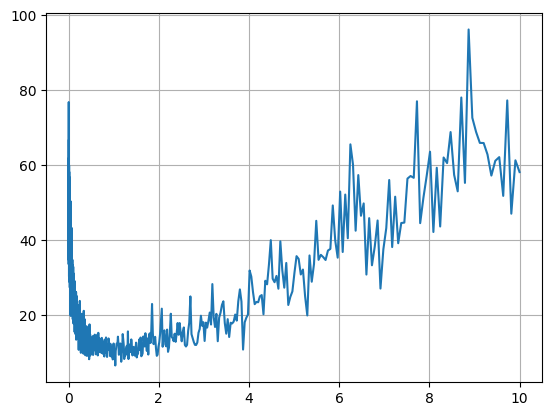

In [914]:
plt.plot(lrs, losst)
plt.grid(True)

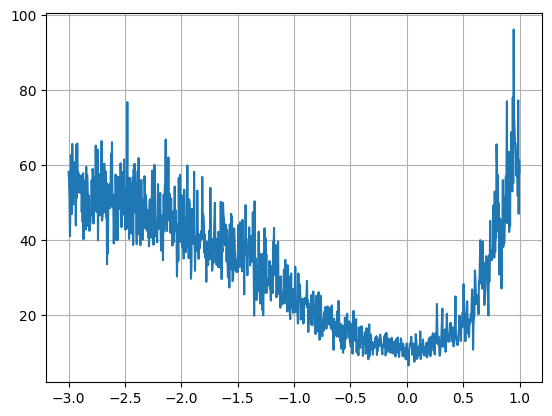

In [916]:
plt.plot(lre, losst)
plt.grid(True)

In [931]:
losst = []

for t in range(1000):
    # mini-batch
    ix = torch.randint(0, X.shape[0], (32, ))

    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    targets = Y[ix]
    loss = F.cross_entropy(logits, targets)
    # print(f"{loss.item() = }")
    
    # backward pass 
    for p in params:
        p.grad = None
    loss.backward()

    # update:
    lr = 0.01
    for p in params: 
        p.data -= lr * p.grad

    losst.append(loss.item())

print(f"{loss.item() = }")

loss.item() = 2.4013288021087646


In [894]:
logits.max(1)

torch.return_types.max(
values=tensor([4.9537, 6.3200, 7.3614, 6.8100, 7.1080, 7.5313, 5.9910, 2.8309, 4.1898,
        3.3781, 4.1941, 4.6449, 7.0445, 5.5799, 4.2020, 3.2069, 6.7142, 4.6586,
        5.0666, 6.3200, 5.5201, 5.4485, 6.3200, 6.3291, 6.3200, 3.3816, 6.3200,
        2.8309, 5.1436, 6.2421, 4.0601, 5.8867], grad_fn=<MaxBackward0>),
indices=tensor([ 0, 19,  4, 25, 25,  0, 19,  0,  9,  6, 25, 25, 25,  4,  0, 13, 25,  0,
         0, 19, 25,  4, 19, 25, 19,  4, 19,  0,  1,  4, 25,  0]))

In [881]:
Y[:32]

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

### evaluate loss on the whole data-set

In [899]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
targets = Y
loss = F.cross_entropy(logits, targets)
print(f"{loss.item() = }")

loss.item() = 3.5992772579193115
